In [2]:
from load_wrf import load_one_wrf, load_all_wrf
from wrf import getvar, to_np, latlon_coords
import numpy as np
import pandas as pd
import xarray as xr

## Prepare the Data

In [3]:
# Load all wrf file
wrf_folder = 'D:/Projects/fiji-training-2024/data/wrf'

# Extract variables
times = load_all_wrf(wrf_folder, 'times')
t2m = load_all_wrf(wrf_folder, 'T2')
u10 = load_all_wrf(wrf_folder, 'U10')
v10 = load_all_wrf(wrf_folder, 'V10')
psfc = load_all_wrf(wrf_folder, 'PSFC')
slp = load_all_wrf(wrf_folder, 'slp')
rainnc = load_all_wrf(wrf_folder, 'RAINNC')
rainc = load_all_wrf(wrf_folder, 'RAINC')
q2 = load_all_wrf(wrf_folder, 'Q2')
rh2 = load_all_wrf(wrf_folder, 'rh2')

# Extract latitude and longitude coordinates
lats, lons = latlon_coords(t2m)

In [4]:
# Calculate total precipitation
total_precip = rainnc + rainc

# Convert times to pandas datetime
times = pd.to_datetime(to_np(times))

In [5]:
ds = xr.Dataset({
    't2': (['time', 'lat', 'lon'], to_np(t2m)),
    'u10': (['time', 'lat', 'lon'], to_np(u10)),
    'v10': (['time', 'lat', 'lon'], to_np(v10)),
    'slp': (['time', 'lat', 'lon'], to_np(slp)),
    'tp': (['time', 'lat', 'lon'], to_np(total_precip)),
    'rh2': (['time', 'lat', 'lon'], to_np(rh2)),
}, coords={
    'time': times,
    'lat': (np.unique(lats)),
    'lon': (np.unique(lons))
})

In [6]:
# set the latitude and longitude
latitude = -17.7134
longitude = 178.0650

# Use .sel() to extract data at specific coordinates
ds_metgram = ds.sel(lat=-17.7134, lon=178.0650, method='nearest')

In [7]:
# Convert to pandas dataframe
df = ds_metgram.to_dataframe()

# Calculate tp hourly
df['tp'] = df['tp'].diff()

# Calculate windspeed
df['ws'] = np.sqrt(df['u10']**2 + df['v10']**2)

# Calculate wind direction
df['wd'] = 180 + np.arctan2(df['u10'], df['v10']) * 180 / np.pi

In [8]:
# See the final dataframe
df

,t2,u10,v10,slp,tp,rh2,lat,lon,ws,wd
time,,,,,,,,,,
2024-06-24 00:00:00,298.226654,-8.878601,0.462917,1017.081970,NaN,68.927811,-17.702972,178.06073,8.890661,92.984612
2024-06-24 01:00:00,298.178894,-7.954722,0.247613,1016.507568,0.010481,71.530914,-17.702972,178.06073,7.958575,91.782913
2024-06-24 02:00:00,298.272339,-8.059346,0.312204,1016.256897,0.018676,71.172348,-17.702972,178.06073,8.065392,92.218430
2024-06-24 03:00:00,298.344452,-7.347298,0.745586,1016.157593,0.051296,70.559334,-17.702972,178.06073,7.385032,95.794411
2024-06-24 04:00:00,298.545868,-7.814343,0.154964,1016.572632,0.006258,70.453751,-17.702972,178.06073,7.815879,91.136070
2024-06-24 05:00:00,298.599457,-7.829573,0.764712,1017.116028,0.022301,70.107353,-17.702972,178.06073,7.866829,95.578369
2024-06-24 06:00:00,298.675476,-7.575019,0.433552,1017.256714,0.003552,70.418938,-17.702972,178.06073,7.587416,93.275719
2024-06-24 07:00:00,298.944366,-8.380356,-0.516991,1017.298889,0.000763,67.520584,-17.702972,178.06073,8.396287,86.469849
2024-06-24 08:00:00,299.246582,-7.936687,-0.224601,1017.516968,0.014020,66.781036,-17.702972,178.06073,7.939864,88.379005


## Plot Meteogram

In [9]:
import matplotlib.pyplot as plt

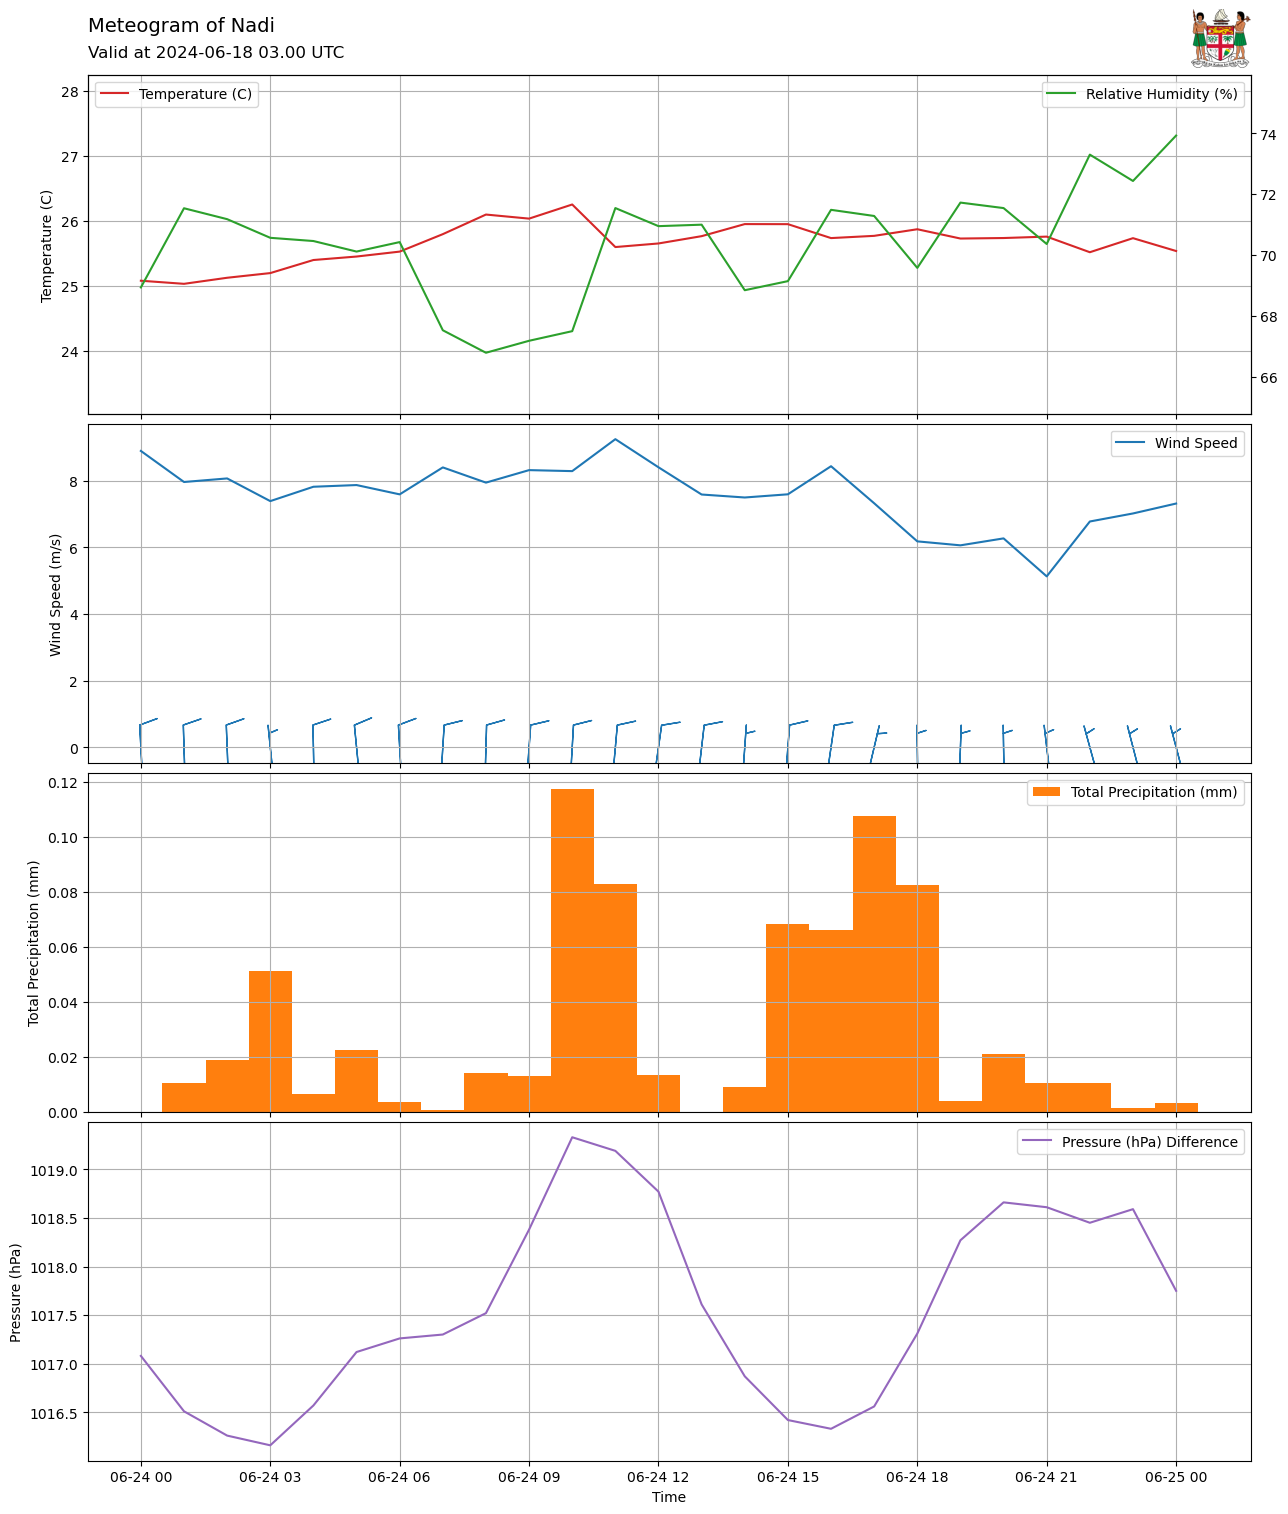

In [27]:
fig, axs = plt.subplots(4, 1, figsize=(15, 18), sharex=True) # Create a figure and a set of subplots

axs[0].plot(df.index, df['t2']-273.15, label='Temperature (C)', color='tab:red')
ax2 = axs[0].twinx()
ax2.plot(df.index, df['rh2'], label='Relative Humidity (%)', color='tab:green')
axs[0].set_ylabel('Temperature (C)')
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')
axs[0].set_ylim((df['t2']-273.15).min()-2,(df['t2']-273.15).max()+2)
ax2.set_ylim((df['rh2']).min()-2,(df['rh2']).max()+2)

axs[1].plot(df.index, df['ws'], label='Wind Speed', color='tab:blue')
axs[1].barbs(df.index, [0]*len(df.index), df['v10'], df['u10'], length=8, pivot='middle', color='tab:blue')
axs[1].set_ylabel('Wind Speed (m/s)')
axs[1].legend()

axs[2].bar(df.index, df['tp'], width=df.index[1]-df.index[0], label='Total Precipitation (mm)', color='tab:orange')
axs[2].set_ylabel('Total Precipitation (mm)')
axs[2].legend()

axs[3].plot(df.index, df['slp'].round(2), label='Pressure (hPa) Difference', color='tab:purple')
axs[3].set_ylabel('Pressure (hPa)')
axs[3].legend()

for ax in axs:
    ax.grid(True)

axs[-1].set_xlabel('Time')

pos = axs[0].get_position()
title_text = 'Meteogram of Nadi'
time_text = 'Valid at 2024-06-18 03.00 UTC'
ax.text(x=pos.x0, y=pos.y1 + 0.024, s=title_text, fontsize=14,ha="left", transform=fig.transFigure)
ax.text(x=pos.x0, y=pos.y1 + 0.01, s=time_text,transform=fig.transFigure, size=12, ha="left")

lgaxes = fig.add_axes([pos.x1 - 0.04, pos.y1, 0.04, 0.04], )  # l,b,w,h
lgaxes.imshow(plt.imread("D:/Projects/fiji-training-2024/data/Coat_of_arms_of_Fiji.png"))
lgaxes.axis("off")

fig.autofmt_xdate()

#adjust the space between the subplots
plt.subplots_adjust(hspace=0.03)


## Some Meteogram Inspiration

